# Predicting Retail Sales: Analysis & Modelling of Big Mart Dataset

**Objective**: Build a Machine Learning model to forecast the sales of each product at a particular store of the supermarket chain Big Mart. Explain how different features (properties of products and stores) affect sales.

**Dataset**: 2013 Sales data for 1559 products across 10 stores in different cities.

**Table of Contents**
1. Loading the Data
2. Exploratory Data Analysis
3. Data Pre-processing & Feature Engineering
4. Train Set Modelling
5. Evaluating Model Performance
6. Features Importance & Model Interpretability
7. Test Set Modelling

## 1. Loading the Data

In [1]:
#Import libraries required for reading and analyzing the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings #ignore warnings
warnings.filterwarnings("ignore")

In [2]:
#Read train and test set
data=pd.read_csv("C:\\Users\\Fabio\\Desktop\\myPythonFolder\Bigmart_Train.csv")
test_data=pd.read_csv("C:\\Users\\Fabio\\Desktop\\myPythonFolder\Bigmart_Test.csv")

In [3]:
#Quick look at first 5 rows of the dataframe
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Dataframe overview: number of observations, number of features, features type, missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Dataframe contains 12 variables: 5 numeric, 7 categorical.
There are Missing values (NaN) in 2 variables, should also check for 0s and value counts for smilar entries.

In [5]:
#Dataframe overview: summary stats
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,NaN,0.026989,93.826500,1987.000000,834.247400
50%,NaN,0.053931,143.012800,1999.000000,1794.331000
75%,NaN,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 2. Exploratory Data Analysis

** 2.1 Exploratory Data Analysis for numeric features**

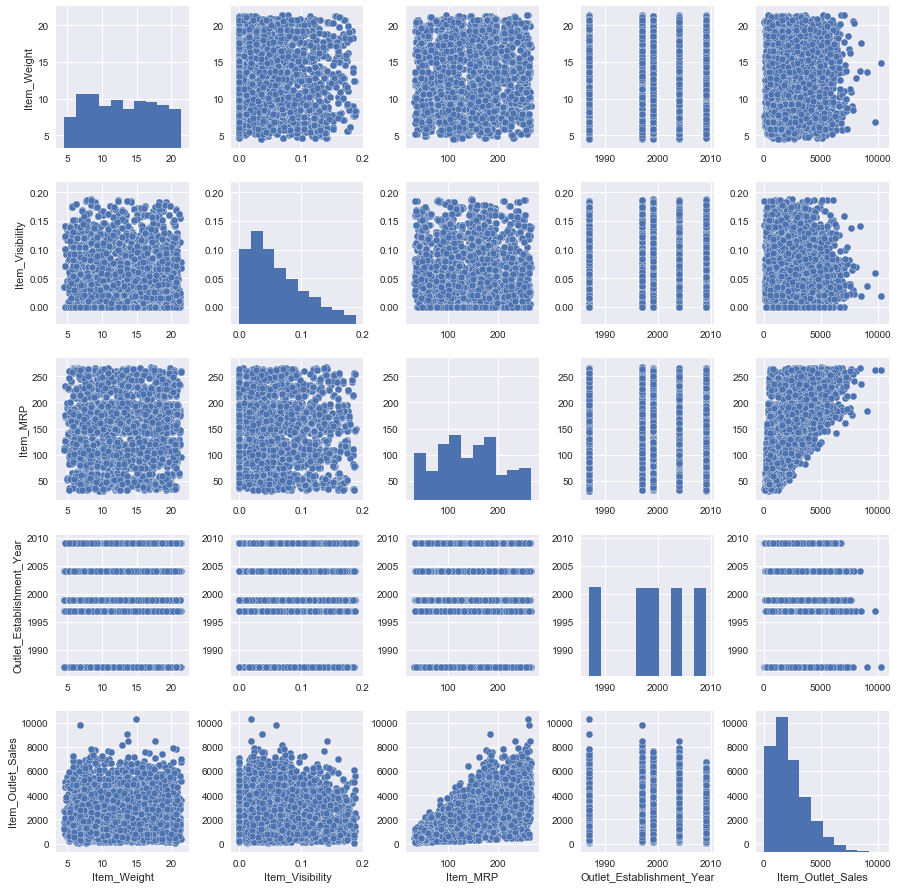

In [6]:
#Explore numeric variables: Plot pair-wise correlations and histograms of each feature
plt.figure(figsize=(10,6))
sns.pairplot(data.dropna())

It doesn't look like the variables are correlated except Item_MRP (Maximum Retail Price). In addition, Outlet_Establishment_Year should be treated as a categorical variable.

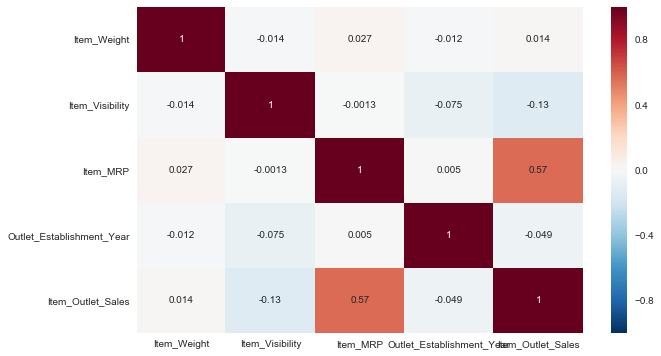

In [7]:
#Plot heatmap for pairwise correlations to quantify correlation between variables
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Heatmap of pair-wise correlation shows meaningful correlation only for Item_MRP.

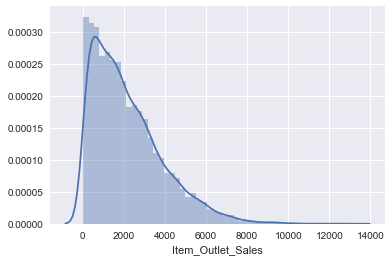

In [8]:
#Plot distribution of target variable
sns.distplot(data['Item_Outlet_Sales'])

The distribution of the target variable is skewed to the right.

**2.2 Exploratory Data Analysis for categorical variables**

EDA for categorical variables in 2 steps:
1. frequency distribution: countplot (unique categories values, unique categories count) 
2. relationship with a dependent variable: box plot or violin plot

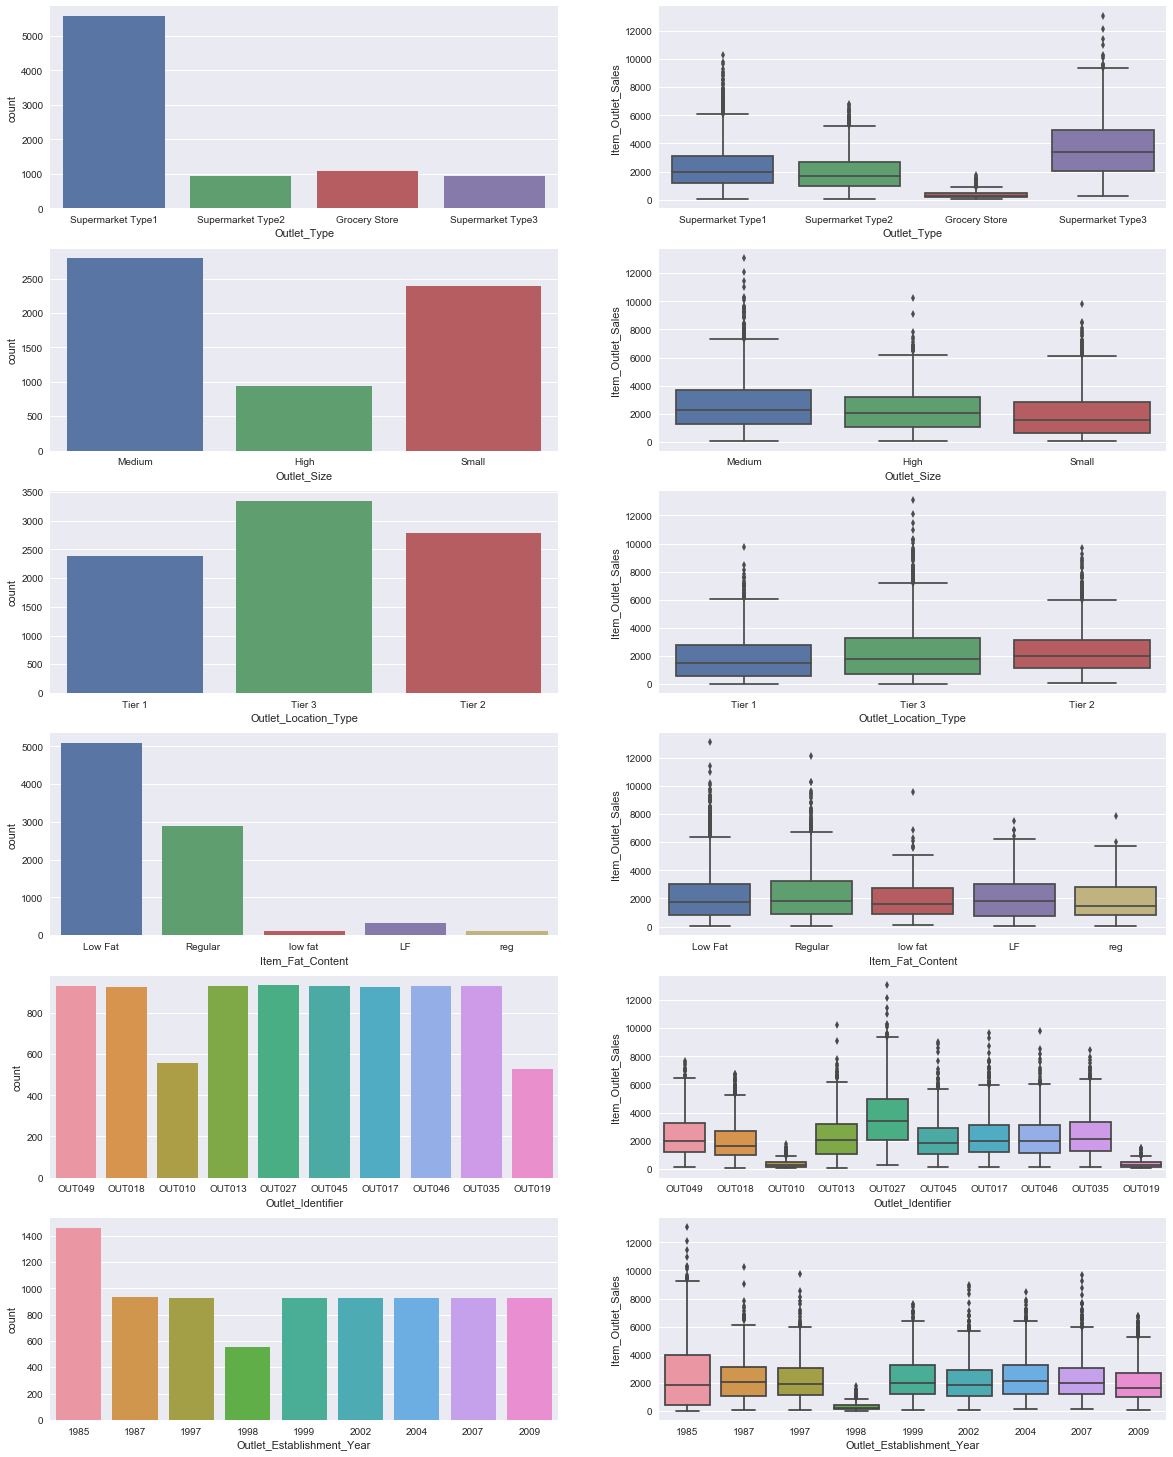

In [9]:
#Visualization of categorical variables: looking at frequency distributions and box plots at the same time

#Set chart size
fig = plt.figure(figsize=(20,26))

#(1,2,1) means 1x2 grid, 1st subplot
ax1 = fig.add_subplot(6,2,1) 
sns.countplot(data = data, x = 'Outlet_Type', ax = ax1)
ax2 = fig.add_subplot(6,2,2) 
sns.boxplot(data = data, x='Outlet_Type', y='Item_Outlet_Sales' , ax = ax2)

ax3 = fig.add_subplot(6,2,3) 
sns.countplot(data = data, x='Outlet_Size', ax = ax3)
ax4 = fig.add_subplot(6,2,4) 
sns.boxplot(data = data, x='Outlet_Size', y='Item_Outlet_Sales' , ax = ax4)

ax5 = fig.add_subplot(6,2,5) 
sns.countplot(data = data, x='Outlet_Location_Type', ax = ax5)
ax6 = fig.add_subplot(6,2,6) 
sns.boxplot(data = data, x='Outlet_Location_Type', y='Item_Outlet_Sales' , ax = ax6)

ax7 = fig.add_subplot(6,2,7) 
sns.countplot(data = data, x='Item_Fat_Content',  ax = ax7)
ax8 = fig.add_subplot(6,2,8) 
sns.boxplot(data = data, x='Item_Fat_Content', y='Item_Outlet_Sales' , ax = ax8)

ax9 = fig.add_subplot(6,2,9) 
sns.countplot(data = data, x='Outlet_Identifier',  ax = ax9)
ax10 = fig.add_subplot(6,2,10) 
sns.boxplot(data = data, x='Outlet_Identifier', y='Item_Outlet_Sales' , ax = ax10)

ax11 = fig.add_subplot(6,2,11) 
sns.countplot(data = data, x='Outlet_Establishment_Year',  ax = ax11)
ax12 = fig.add_subplot(6,2,12) 
sns.boxplot(data = data, x='Outlet_Establishment_Year', y='Item_Outlet_Sales' , ax = ax12)

#sns.swarmplot(data = data, x='Outlet_Size', y='Item_Outlet_Sales' , ax = ax2)
#sns.violinplot(data = data, x='Outlet_Size', y='Item_Outlet_Sales' , ax = ax2)

All these categorical variables can be included in the model by transforming them to dummy variables. In addition, the variable Item_Fat_Type should be cleaned as the same categories are shown with different names.

The last variable to visualize is Item_Type. This contains many different categories, so it would be useful to group the products in fewer categories by using Item_Identifier and reduce the number of dummy variables needed.

In [10]:
#Frequency Distribution for Item type
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

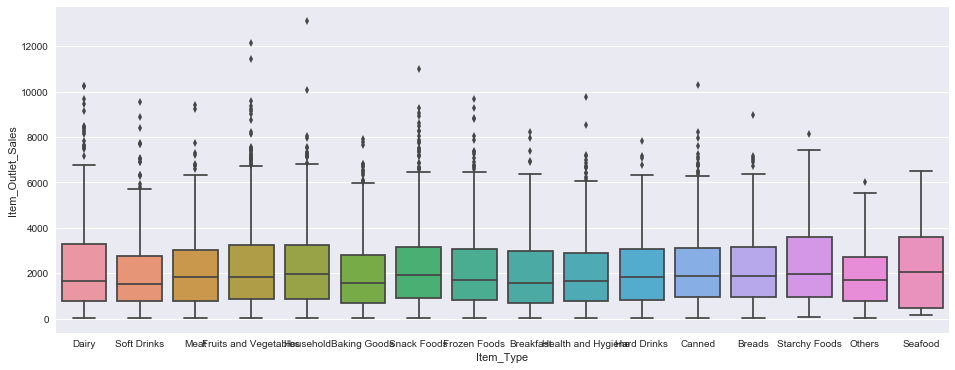

In [11]:
#Boxplot for Item Type and Item Sales
plt.figure(figsize=(16,6))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)

The variable Item_Type also requires some data cleaning. For example, non-consumable items should not have any fat content.

In [67]:
#Filter for Household items (Non-consumable items) 
data[data.Item_Type=="Household"].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_L1
4,NCD19,8.930,Non-Consumable,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
22,NCB30,14.600,Non-Consumable,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,NC
25,NCD06,13.000,Non-Consumable,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080,NC
54,NCP18,12.150,Non-Consumable,0.028760,Household,151.4708,OUT017,2007,Medium,Tier 2,Supermarket Type1,4815.0656,NC
56,NCX54,9.195,Non-Consumable,0.048157,Household,106.1622,OUT045,2002,Medium,Tier 2,Supermarket Type1,2117.2440,NC


## 3. Data Pre-processing & Feature Engineering

In this section we are going to replace missing values in the Train Set and create new features to be used in the modelling part. Imputed values are saved and then applied during Test Set pre-processing once training is complete.

**3.1 Data Cleaning**

In [12]:
#Explore training data for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Outlet_Size and Item_Weight contain missing values and should be imputed.

In [68]:
#Calculate mean for Item Weight and store it
item_weight_avg=data['Item_Weight'].mean()
item_weight_avg

12.857645184136409

In [14]:
#Replace missing value with mean
data['Item_Weight']=data['Item_Weight'].fillna(item_weight_avg)

In [15]:
#Check if NaNs were replaced
data['Item_Weight'].isnull().sum()

0

In [69]:
#Calculate mode for Outlet Size and store it [Outlet Size is categorical and mode will return most frequent observation]
outlet_size_mode = data['Outlet_Size'].mode()[0]
outlet_size_mode

'Medium'

In [17]:
#Replace missing values with mode
data['Outlet_Size']=data['Outlet_Size'].fillna(outlet_size_mode)

In [18]:
#Check if NaNs were replaced
data['Outlet_Size'].isnull().sum()

0

In [19]:
#Summary stats of the training set: check if min,max make sense
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Minimum of Item_Visibility can't be 0, so should be trated as a missing value.

In [20]:
#Replacing 0s with nans
data['Item_Visibility']=data['Item_Visibility'].replace(0, np.nan)

In [70]:
#Calculate avg and store it
item_visibility_avg=data['Item_Visibility'].mean()
item_visibility_avg

0.07048184085069353

In [22]:
#Imputing NaNs with mean
data['Item_Visibility']=data['Item_Visibility'].fillna(item_visibility_avg)

In [23]:
#Check how many categories and count for each Item_Fat_Content. Bar Plot was showing some categories were spelled incorrectly
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
#Replace categories spelled incorrectly with correct spelling
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(to_replace =["LF", "low fat"], value ="Low Fat")
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(to_replace =["reg"], value ="Regular")

**3.2 Feature Engineering**

In [71]:
#Create a category grouping (L1) for each item based on item identifier (first 2 characters)
data['Item_Type_L1'] = data['Item_Identifier'].astype(str).str[:2]
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_L1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non-Consumable,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [26]:
#Non-consumable items shouldn't have any fat content. Add a new category for non-consumable in the fat content variable
data.loc[data.Item_Type_L1 == 'NC', 'Item_Fat_Content'] = 'Non-Consumable'

In [27]:
#Validate how many categories and count for each
data.Item_Fat_Content.value_counts()

Low Fat           3918
Regular           3006
Non-Consumable    1599
Name: Item_Fat_Content, dtype: int64

The Train Set contains many categorical variables with important information for our model. In order to use them for modelling, we need to transform these to dummy variables. 

In [28]:
#Create dummy variables for the followings features: Outlet_Size,Outlet_Type,Outlet_Location_Type,Item_Fat_Content
encoded_data=pd.get_dummies(data, columns=['Outlet_Size','Outlet_Type','Outlet_Location_Type',\
                                           'Item_Fat_Content','Item_Type_L1','Outlet_Identifier'], \
                            drop_first=False, prefix=['Out_Size','Out_Type','Out_Loc_Type','Fat_Con','Item_Type','Out_Id'])

The variable Outlet_Establishment_Date needs to be transformed as well to be included in our model. We can transform this categorical variable as number of years the store was open.

In [29]:
#Calculate number of years each store was open (dataset was collected in 2013)
encoded_data['Years_Open']=2013-encoded_data.Outlet_Establishment_Year

## 4. **Train Set Modelling**

In this section we are going to train different regression models and calculate their root-mean squared error (RMSE) to evaluate performance.

In [30]:
#Import libraries required for modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.externals import joblib

In [31]:
#Drop target variable and keep only numeric variables (excluding Date)
X_train=encoded_data.drop(["Item_Outlet_Sales","Outlet_Establishment_Year"],axis=1).select_dtypes(['number'])

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
Item_Weight                   8523 non-null float64
Item_Visibility               8523 non-null float64
Item_MRP                      8523 non-null float64
Out_Size_High                 8523 non-null float64
Out_Size_Medium               8523 non-null float64
Out_Size_Small                8523 non-null float64
Out_Type_Grocery Store        8523 non-null float64
Out_Type_Supermarket Type1    8523 non-null float64
Out_Type_Supermarket Type2    8523 non-null float64
Out_Type_Supermarket Type3    8523 non-null float64
Out_Loc_Type_Tier 1           8523 non-null float64
Out_Loc_Type_Tier 2           8523 non-null float64
Out_Loc_Type_Tier 3           8523 non-null float64
Fat_Con_Low Fat               8523 non-null float64
Fat_Con_Non-Consumable        8523 non-null float64
Fat_Con_Regular               8523 non-null float64
Item_Type_DR                  8523 non-null float64
Item_Type

In [33]:
#Define target variable
y_train=encoded_data.Item_Outlet_Sales

**Linear Regression**

In [34]:
#Instantiate regressor
lm=LinearRegression()
#Fit the model
lm.fit(X_train,y_train)
#Predict target
y_pred=lm.predict(X_train)
#Calculate RMSE
rmse_lm = np.sqrt(MSE(y_train,y_pred))
rmse_lm

1127.4134433948507

**Lasso, Ridge, and Elastic Net**

These three regression models require data to be standardized before training

In [35]:
# Standardization in 2 steps
#1-Create scaler
scaler = preprocessing.StandardScaler()
#2-Transform features
X_train_standardized = scaler.fit_transform(X_train)

In [36]:
# Lasso 
#Instantiate regressor
lasso = linear_model.Lasso()  
#Fit the model
lasso.fit(X_train_standardized,y_train)
#Generate prediction 
y_pred=lasso.predict(X_train_standardized)
#Calculate RMSE
np.sqrt(MSE(y_train,y_pred))

1127.4185275610348

In [37]:
# Ridge
#Instantiate regressor
ridge = linear_model.Ridge()
#Fit the model
ridge.fit(X_train_standardized,y_train)
#Generate prediction
y_pred=ridge.predict(X_train_standardized)
#Calculate RMSE
np.sqrt(MSE(y_train,y_pred))     

1127.413450018407

In [38]:
# Elastic Net
#Instantiate regressor
en = linear_model.ElasticNet()    
#Fit the model
en.fit(X_train_standardized,y_train)       
#Generate prediction
y_pred=en.predict(X_train_standardized)
#Calculate RMSE
np.sqrt(MSE(y_train,y_pred))     

1182.5155724890465

**Decision Tree**

In [39]:
#Instantiate model
dt=DecisionTreeRegressor()
#Fit model
dt.fit(X_train,y_train)
#Predict target
y_pred=dt.predict(X_train)
#Calculate RMSE
rmse_dt=np.sqrt(MSE(y_train,y_pred))
rmse_dt

0.0

**Random Forest**

In [40]:
#Instantiate model
rf=RandomForestRegressor()
#Fit model
rf.fit(X_train,y_train)
#Generate prediction
y_pred=rf.predict(X_train)
#Calculate RMSE
rmse_rf=np.sqrt(MSE(y_train,y_pred))
rmse_rf 

495.9087600007596

**Extreme Gradient Boosting (XGBoost)**

In [41]:
#Instantiate model
xgb=XGBRegressor(objective ='reg:squarederror')
#Fit model
xgb.fit(X_train,y_train)
#Generate prediction
y_pred=xgb.predict(X_train)
#Calculate RMSE
rmse_xgb=np.sqrt(MSE(y_train,y_pred))
rmse_xgb

1040.8173756620058

In [42]:
#Save XGBoost model to disk as best performing one based on Cross-Validation (see below for cross validation scores)
filename = 'xgb_trained_model.pkl'
joblib.dump(xgb, filename)

['xgb_trained_model.pkl']

Decision Tree and Random Forest had the lowest RMSE, but that may be because of the model overfitting the Training data. We can better evaluate model performance using Cross-Validation.

## 5. Evaluating Model Performance

The RMSE values previously calculated may be due to overfitting. To be sure, we need to use part of the training set for training and part for validation. Cross-Validation randomly split the trainings set into 10 parts (or folds) and evaluate the model 10 times, picking a different fold for evaluation each time and training on the other 9 folds. As a result of this procedure, we get 10 scores that allow us to better understand model performance and also calculate the uncertainty around model prediction.

In [43]:
#Define function to display Cross-Validation scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
#Scores for Linear Regression
scores=cross_val_score(lm,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lm_rmse_scores=np.sqrt(-scores)

display_scores(lm_rmse_scores)

Scores: [1163.48395068 1139.41872268 1123.18051829 1110.0043482  1120.09906639
 1108.01268741 1114.29734361 1135.4722065  1138.16424104 1143.6754963 ]
Mean: 1129.5808581097417
Standard deviation: 16.6316710126896


In [45]:
#Scores for Lasso
scores=cross_val_score(lasso,X_train_standardized,y_train,scoring="neg_mean_squared_error",cv=10)
lasso_rmse_scores=np.sqrt(-scores)

display_scores(lasso_rmse_scores)

Scores: [1163.51852331 1139.64274572 1123.06357208 1110.01255371 1119.69872963
 1108.01368816 1114.16665014 1135.47542427 1138.04931734 1143.7170494 ]
Mean: 1129.5358253770291
Standard deviation: 16.68852804421226


In [46]:
#Scores for Ridge
scores=cross_val_score(ridge,X_train_standardized,y_train,scoring="neg_mean_squared_error",cv=10)
ridge_rmse_scores=np.sqrt(-scores)

display_scores(ridge_rmse_scores)

Scores: [1163.49168169 1139.42643985 1123.17837452 1110.00076459 1120.07941457
 1108.01341071 1114.30163505 1135.47698015 1138.16375819 1143.67283812]
Mean: 1129.580529744947
Standard deviation: 16.63476028216251


In [47]:
#Scores for ElasticNet
scores=cross_val_score(en,X_train_standardized,y_train,scoring="neg_mean_squared_error",cv=10)
en_rmse_scores=np.sqrt(-scores)

display_scores(en_rmse_scores)

Scores: [1234.37078875 1212.93543244 1171.69989925 1159.77194841 1128.6781385
 1167.52218901 1179.28326042 1196.57321834 1195.57011512 1192.19060986]
Mean: 1183.8595600107967
Standard deviation: 27.974779816765274


In [48]:
#Scores for Decision Tree
scores=cross_val_score(dt,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
dt_rmse_scores=np.sqrt(-scores)

display_scores(dt_rmse_scores)

Scores: [1540.01749538 1630.12307097 1518.74973352 1509.10664666 1601.43566306
 1527.3571272  1547.17010616 1516.04804749 1530.22417359 1619.85932468]
Mean: 1554.009138870286
Standard deviation: 43.12534001553934


In [49]:
#Scores for Random Forest
scores=cross_val_score(rf,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [1213.52325855 1211.15460384 1207.0576711  1141.99661538 1167.92089234
 1164.87671863 1169.16405543 1177.69926491 1152.84177927 1206.29230644]
Mean: 1181.252716590651
Standard deviation: 24.862187982330674


In [50]:
#Scores for XGboost
scores=cross_val_score(xgb,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
xg_rmse_scores=np.sqrt(-scores)

display_scores(xg_rmse_scores)

Scores: [1114.44874097 1089.51603758 1097.51794921 1061.89499977 1085.05511498
 1065.37317131 1047.89175802 1089.20035765 1063.81393328 1110.58606012]
Mean: 1082.5298122899153
Standard deviation: 20.97741814242208


XGBoost is the best model based on the RMSE scores calculated through Cross-Validation. It also has lower standard deviation than Decision Tree and Random Forest. 

## 6. **Feature Importance and Model Interpretability**

In this section we are going to use the SHAP package to interpret a black-box model like Extreme Gradient Boosting. SHAP achieves this by changing the inputs of the model and observing how the prediction changes: by doing so we can get a measure of Feature Importance by looking at how much the performance of the model drop by removing/changing a feature.

In [51]:
#Import SHAP packge for ML interpretability
import shap
shap.initjs() #initialize JavaScript for Jupyter Notebook

In [52]:
#Create TreeExplainer and estimate Shap values
explainer=shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_train)

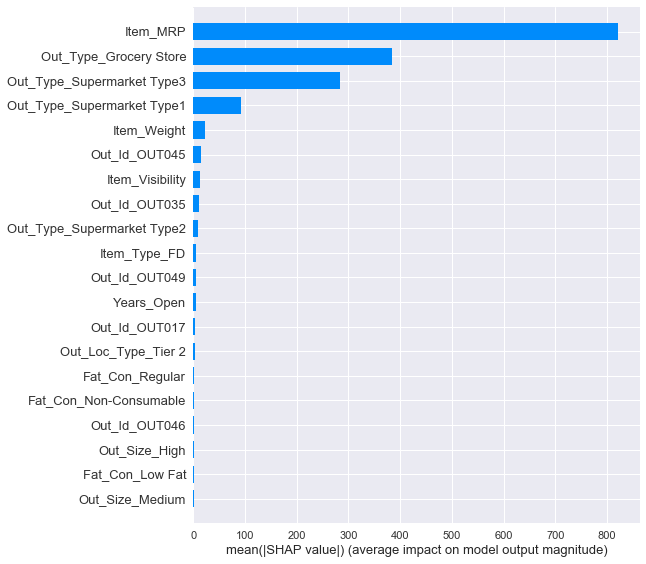

In [53]:
#Feature Importance Plot (or global model interpretability)
fig, ax= plt.subplots(figsize=(6,4))
shap.summary_plot(shap_values,X_train,plot_type="bar")

The **Feature Importance Plot** tells us that Maximum Retail Price, Outlet Type, and Item Weight were the most important features. However, this plot doesn't tell us whether these features have a positive or negative impact on the target variable. To see that, we can look at the **Partial Depence Plot**.

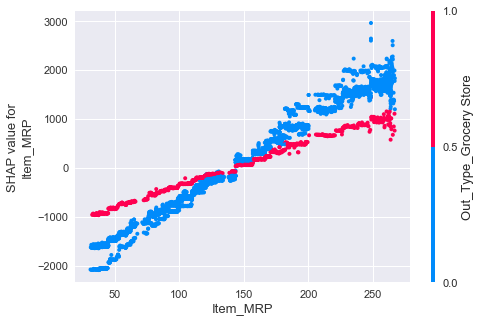

In [54]:
#Partial Dependence Plot for Item_MRP
shap.dependence_plot("Item_MRP",shap_values,X_train)

There seems to be a linear relationship between Item_MRP and Item_Sales. High values of Item_MRP are linked to higher sales, while low values of Item_MRP are linked to low sales.
This plot also shows the interaction of Item_MRP with Grocery Store Type. The linear relationship between Item_MRP and sales is steeper for big supermarkets.

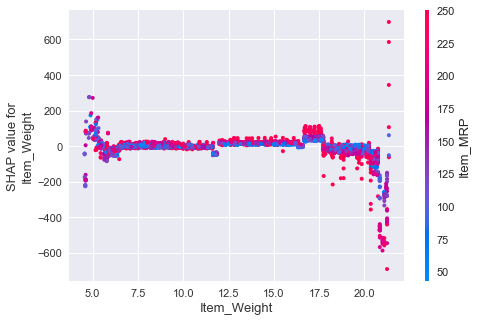

In [55]:
#Partial Dependence Plot for Item_Weight
shap.dependence_plot("Item_Weight",shap_values,X_train)

This partial dependence plot shows an interesting non-linear relationship between Item_Weight and Item_Sales: items with high weight (greater than 17.5) tend to have lower sales, whereas item with low weight (less than 5) tend to have lower sales.

We can also summarize the partial dependence plots for all the features using SHAP's **summary plot**.

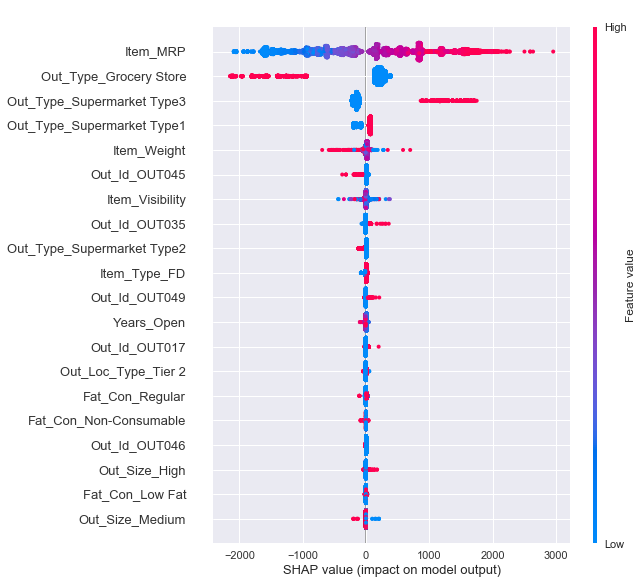

In [56]:
#Call and display SHAP Summary Plot
fig, ax= plt.subplots(figsize=(6,4))
shap.summary_plot(shap_values,X_train)

The features are sorted based on their importance. In this case, we can see that a high value of Maximum Retail Price is linked with higher sales, while a Grocery store is linked to lower sales.

Lastly, we are going to look at the **Force Plot**, which is a local interpretability plot: a way to explain individual predictions.

In [57]:
#Individual SHAP Value Plot 
#First, look at a specific prediction, say index =5
sample_idx=5
xgb.predict(X_train.iloc[[sample_idx]])

array([596.5181], dtype=float32)

In [58]:
#Create force plot for one sample
shap.force_plot(explainer.expected_value,shap_values[sample_idx],X_train.iloc[sample_idx])

The Force Plot is based on 2 values:
1. **Output value**, which is the prediction for the sampled observation
2. **Base value**, which is the value that would be predicted if we did not know any features for the current output (i.e., the mean prediction)

Features shown in red push the prediction up (to the right), while features in blue push the prediction down (to the left).
In this example, "Item_Sales" increases when the outlet type is not "Grocery Store", while a low value of "Item_MRP" and outlet type different than "Supermarket Type 1" & "Supermarket Type 3" push the sales down.

## 7. **Test Set Modelling**

In this last section, we are going to carry out the same data pre-processing done on the Train Set and use the model chosen in the modelling part to predict sales.

**Test Set overview**

In [59]:
#Test data overview
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Test Set pre-processing**

In [60]:
#Replace missing value with mean
test_data['Item_Weight']=test_data['Item_Weight'].fillna(item_weight_avg)
#Replace missing with mode
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(outlet_size_mode)
#Replacing 0s with nans
test_data['Item_Visibility']=test_data['Item_Visibility'].replace(0, np.nan)
#Imputing nans with mean
test_data['Item_Visibility']=test_data['Item_Visibility'].fillna(item_visibility_avg)
test_data['Item_Type_L1'] = test_data['Item_Identifier'].astype(str).str[:2]
#Data pre-processing needed as feature doesn't have consistent spelling of categories
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace =["LF", "low fat"], value ="Low Fat")
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace =["reg"], value ="Regular")
#Non-consumable items shouldn't have any fat content
test_data.loc[data.Item_Type_L1 == 'NC', 'Item_Fat_Content'] = 'Non-Consumable'

In [61]:
#Create dummy variables
encoded_test_data=pd.get_dummies(test_data, columns=['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',\
                                           'Item_Type_L1','Outlet_Identifier'], \
                            drop_first=False, prefix=['Out_Size','Out_Type','Out_Loc_Type','Fat_Con','Item_Type','Out_Id'])

#Calculate years store open
encoded_test_data['Years_Open']=2013-encoded_test_data.Outlet_Establishment_Year
#Drop target and keep only numeric variables (ex dates)
X_test=encoded_test_data.drop("Outlet_Establishment_Year",axis=1).select_dtypes(['number'])

In [62]:
#Overview of pre-processed test set
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 30 columns):
Item_Weight                   5681 non-null float64
Item_Visibility               5681 non-null float64
Item_MRP                      5681 non-null float64
Out_Size_High                 5681 non-null float64
Out_Size_Medium               5681 non-null float64
Out_Size_Small                5681 non-null float64
Out_Type_Grocery Store        5681 non-null float64
Out_Type_Supermarket Type1    5681 non-null float64
Out_Type_Supermarket Type2    5681 non-null float64
Out_Type_Supermarket Type3    5681 non-null float64
Out_Loc_Type_Tier 1           5681 non-null float64
Out_Loc_Type_Tier 2           5681 non-null float64
Out_Loc_Type_Tier 3           5681 non-null float64
Fat_Con_Low Fat               5681 non-null float64
Fat_Con_Non-Consumable        5681 non-null float64
Fat_Con_Regular               5681 non-null float64
Item_Type_DR                  5681 non-null float64
Item_Type

**Predict target and write output to csv**

In [63]:
#load XGBoost model from disk
xgb_model = joblib.load(filename)
result = xgb_model.predict(X_test)
result

array([1599.0156, 1408.875 ,  587.1625, ..., 1798.1777, 3627.4478,
       1273.3004], dtype=float32)

In [64]:
#Add prediction to test set
data_frame= test_data
data_frame['Item_Outlet_Sales_pred']=result

In [65]:
#Select variables to be included in the outout
data_frame=data_frame[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_pred']]
data_frame.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_pred
0,FDW58,OUT049,1599.015625
1,FDW14,OUT017,1408.875000
2,NCN55,OUT010,587.162476
3,FDQ58,OUT017,2527.753662
4,FDY38,OUT027,6149.453613


In [66]:
#Convert to csv
data_frame.to_csv('Big Market Sales Prediction.csv',index=0)